In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
df_analyse=pd.read_csv('Documents/ads_covid-19/data/processed/CovidRate.csv',sep=';')
df_analyse.sort_values('date',ascending=True)
df_analyse

,date,Canada,Germany,United States,Italy,Spain
0,2021-01-02,1.578812,2.104522,6.125404,3.614431,4.060622
1,2021-01-03,1.604038,2.116888,6.185761,3.638477,4.060622
2,2021-01-04,1.629505,2.128694,6.240807,3.656705,4.125017
3,2021-01-05,1.649235,2.142958,6.309905,3.682658,4.174925
4,2021-01-06,1.672590,2.168419,6.386986,3.716970,4.174925
...,...,...,...,...,...,...
560,2022-07-16,10.551809,35.599453,26.566596,33.890532,27.566479
561,2022-07-17,10.551809,35.599453,26.572178,34.007000,27.566479
562,2022-07-18,10.551875,35.792108,26.621031,34.061103,27.566479
563,2022-07-19,10.580125,35.961155,26.656122,34.265530,27.654257


In [39]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

## beta/gamma is the basic reproduction number, <1 means no spread virus


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [36]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to calculate SIR curves

In [37]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],


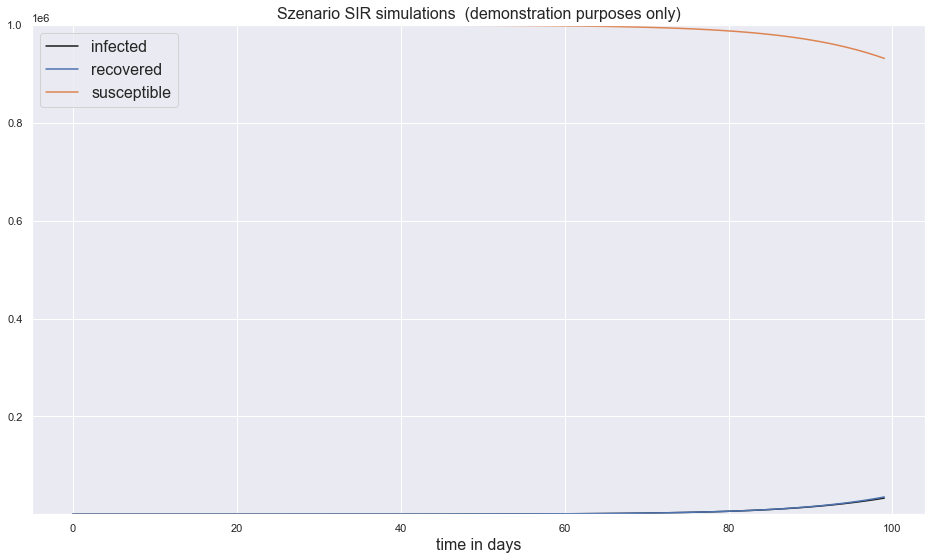

In [38]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting data to a model

## step one: always start on simulative / constructive data

In [7]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [8]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [9]:
## fit the data set ydata, here the simulative data set of the infected curve

ydata = propagation_rates.infected
t=np.arange(len(ydata))

In [17]:
ydata

array([2.76977946, 2.78160079, 2.79161655, 2.79894674, 2.80425315,
       2.80887617, 2.8179352 , 2.83017255, 2.84109829, 2.85208517,
       2.86128806, 2.86652614, 2.87118153, 2.88078127, 2.89501122,
       2.90699681, 2.91870064, 2.9281601 , 2.93383338, 2.93856071,
       2.94937375, 2.96365526, 2.97633981, 2.98779787, 2.9975127 ,
       3.00352048, 3.00861828, 3.01958358, 3.03679524, 3.05218215,
       3.06737724, 3.08031356, 3.08823121, 3.09480128, 3.11090874,
       3.1318946 , 3.15285408, 3.17207633, 3.18854107, 3.19778353,
       3.20675743, 3.22571591, 3.25287979, 3.27874405, 3.30328829,
       3.32388091, 3.33571662, 3.34716509, 3.36760784, 3.39674154,
       3.42298345, 3.44471863, 3.45934063, 3.46952784, 3.47778239,
       3.48938431, 3.51385063, 3.54437987, 3.57327019, 3.59467687,
       3.61055654, 3.62351684, 3.64952496, 3.68480432, 3.71577356,
       3.7443126 , 3.76731384, 3.78102586, 3.79254627, 3.82238014,
       3.85776979, 3.89079158, 3.91883667, 3.94134395, 3.95561

In [10]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\kiran\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\kiran\AppData\Local\Temp\ipykernel_1332\649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\kiran\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.0008368  0.00078066]  start infect: 3.5464105001516173
Optimal parameters: beta = 0.3705598140685151  and gamma =  0.09598284449440939


In [11]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

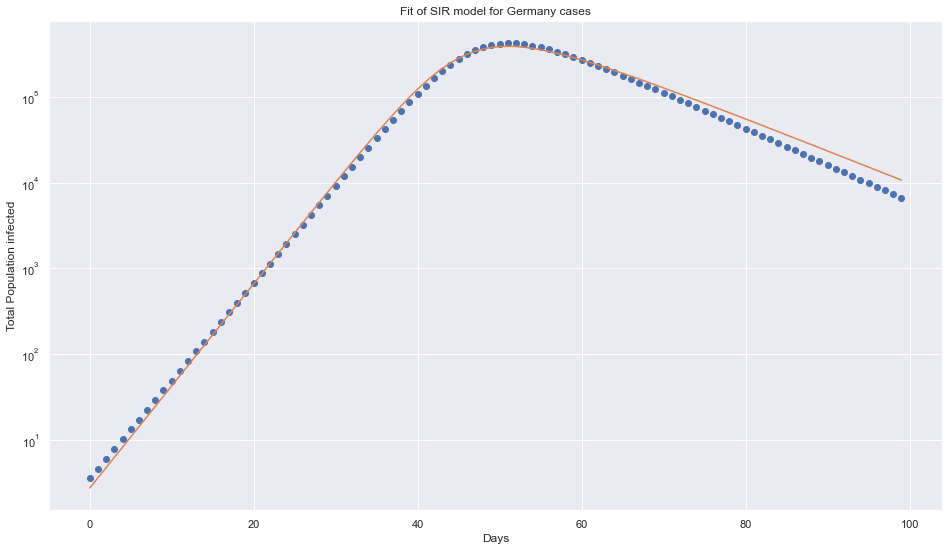

Optimal parameters: beta = 0.3705598140685151  and gamma =  0.09598284449440939
Basic Reproduction Number R0  3.860687980445284
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible.


In [12]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
#plt.semilogy(fitted)

plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Total Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible.")

# Fitting the parameters of SIR model

In [69]:
df_analyse

,date,Canada,Germany,United States,Italy,Spain
0,2021-01-02,1.578812,2.104522,6.125404,3.614431,4.060622
1,2021-01-03,1.604038,2.116888,6.185761,3.638477,4.060622
2,2021-01-04,1.629505,2.128694,6.240807,3.656705,4.125017
3,2021-01-05,1.649235,2.142958,6.309905,3.682658,4.174925
4,2021-01-06,1.672590,2.168419,6.386986,3.716970,4.174925
...,...,...,...,...,...,...
560,2022-07-16,10.551809,35.599453,26.566596,33.890532,27.566479
561,2022-07-17,10.551809,35.599453,26.572178,34.007000,27.566479
562,2022-07-18,10.551875,35.792108,26.621031,34.061103,27.566479
563,2022-07-19,10.580125,35.961155,26.656122,34.265530,27.654257


In [84]:
df_analyse.rename(columns = {'United States':'US'}, inplace = True)

In [105]:
## slice out some true data of a country

ydata = np.array(df_analyse.Germany[:])
t=np.arange(len(ydata))

In [106]:
# ensure re-initialization 
# attenion when slicing gout only a time window 
# (one Corana wave) the overall N0 is not the full popoulation size 
N0=800000

I0=ydata[0]
S0=N0-I0
R0=0
print('start infected:',I0)
print('cumulative sum of invected after period',ydata[-1])
print('Number of days',len(ydata))
print('N0',N0)

start infected: 2.1045215578248726
cumulative sum of invected after period 36.12495548118482
Number of days 565
N0 800000


In [107]:
## get the model parameters / fit the model
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# get the final fitted curve / predict the outcome 
fitted=fit_odeint(t, *popt)

standard deviation errors :  [0.00200442 0.00193231]  start infect: 2.1045215578248726
Optimal parameters: beta = 0.24156273457269994  and gamma =  0.23631182555229122


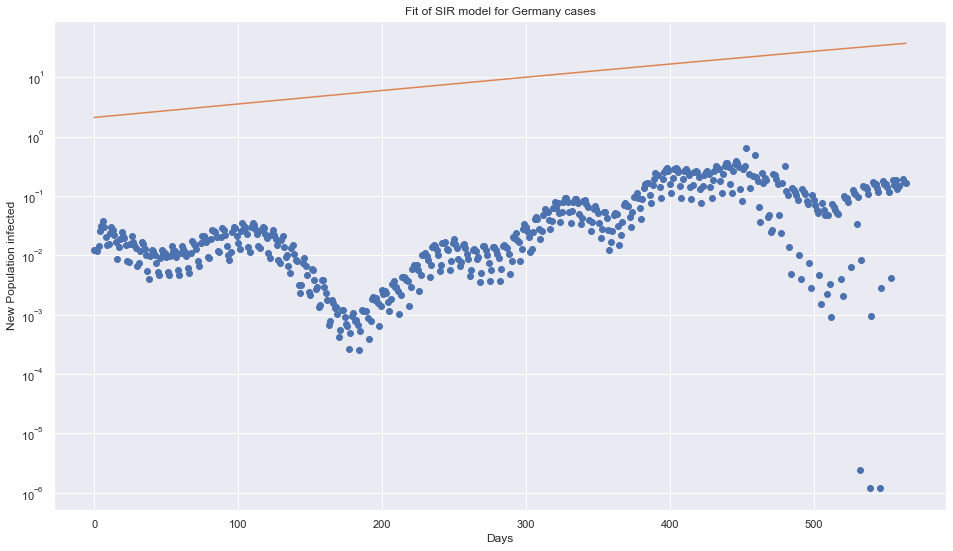

Optimal parameters: beta = 0.24156273457269994  and gamma =  0.23631182555229122
Basic Reproduction Number R0  1.0222202549878183
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible.


In [108]:
# option 1: ydata is cummulative, thus we need cumulative fitted line
#plt.semilogy(t, ydata, 'o') 
#plt.semilogy(t, np.cumsum(fitted))

# option2: ydata is cummulative, however we would like to have the day to day difference
plt.semilogy(t,np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), 'o')
plt.semilogy(t, fitted)

plt.title("Fit of SIR model for Germany cases")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible.")